In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc

In [3]:
df = pd.read_csv("d'angelo headcounds FY23 - Sheet1.csv")
df

,Date of headcount,Day,Quarter,Interim? (True/False),Time of Day,2CenterTables,2LowShelfSeat,2Consultation,2WindowTables,2ElevatorFoyer,...,5thTotal,6CenterTables,6Computers,6WestSoftSeats,6WindowCarrels,6CenterCarrels,6Room613,6Room615,6thTotal,LibraryTotal
0,10/19/2022,Wednesday,Autumn,False,Opening,2,0,0,3,0,...,1,1.0,0,0,1,0,0,0,2,14
1,5/8/2023,Monday,Spring,False,Opening,0,1,0,2,0,...,3,0.0,0,0,1,0,0,0,2,12
2,3/11/2023,Saturday,Spring,True,Opening,0,0,0,0,0,...,1,0.0,0,0,0,0,0,0,0,3
3,3/18/2023,Saturday,Spring,True,Opening,0,0,0,0,0,...,2,0.0,0,0,0,0,0,0,0,2
4,3/25/2023,Saturday,Spring,False,Opening,0,0,0,1,0,...,1,1.0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2/8/2023,Wednesday,Winter,False,Closing,1,0,0,3,0,...,2,0.0,0,0,0,0,0,0,0,8
505,2/15/2023,Wednesday,Winter,False,Closing,1,1,0,1,0,...,4,0.0,0,0,0,0,0,0,0,9
506,2/22/2023,Wednesday,Winter,False,Closing,0,0,0,1,0,...,3,0.0,0,1,0,0,0,0,1,8
507,3/1/2023,Wednesday,Winter,False,Closing,3,1,0,2,0,...,1,4.0,0,0,0,3,1,0,8,18


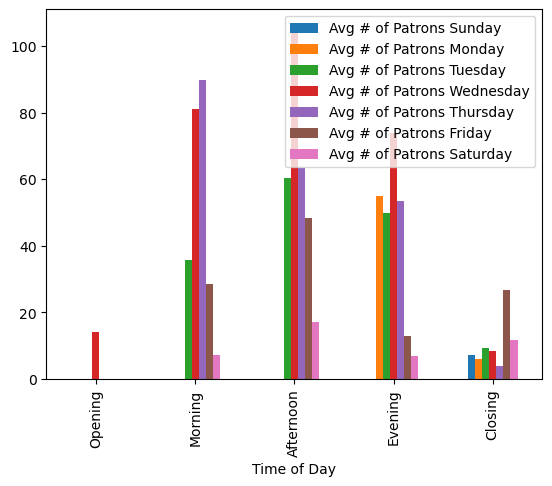

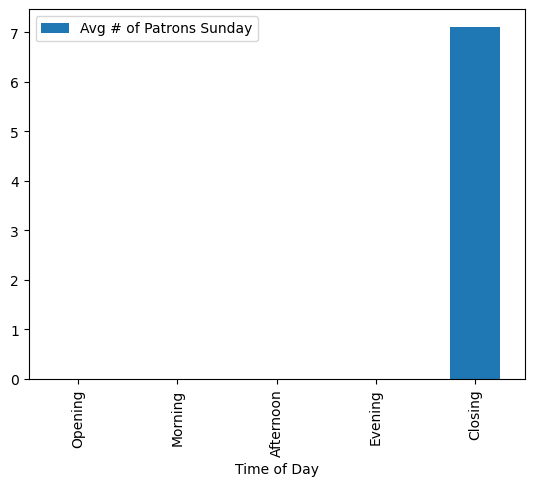

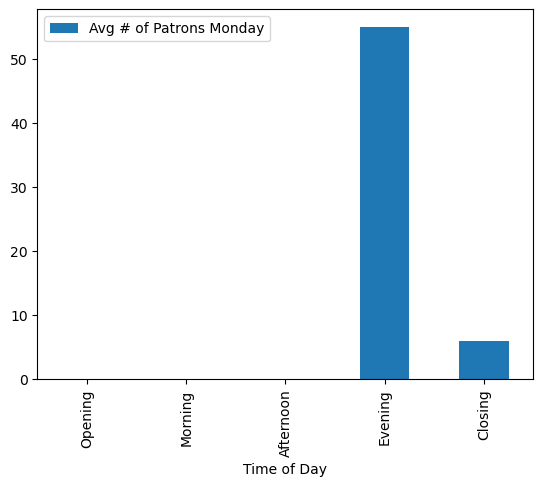

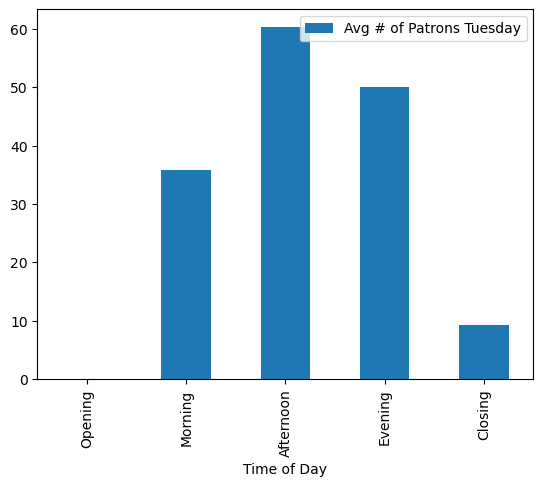

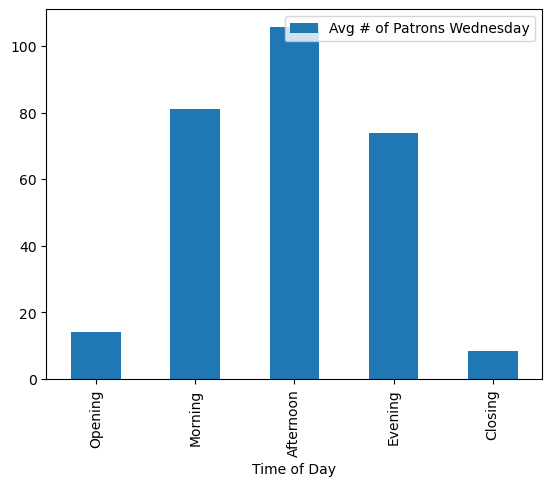

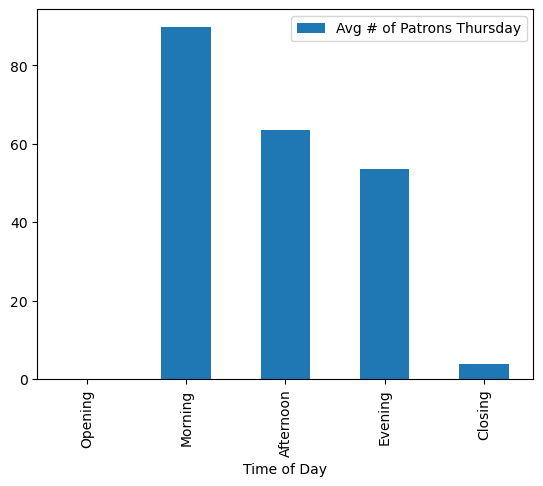

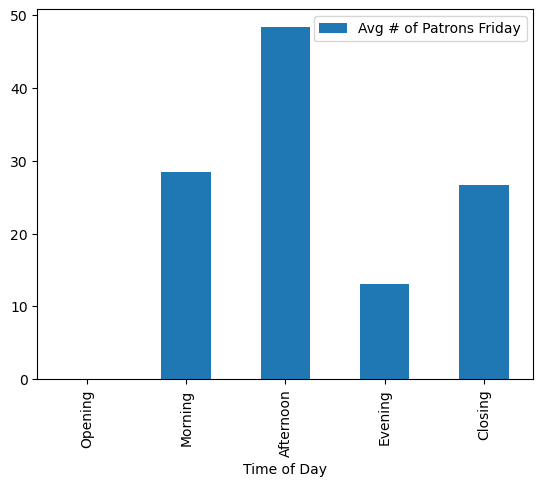

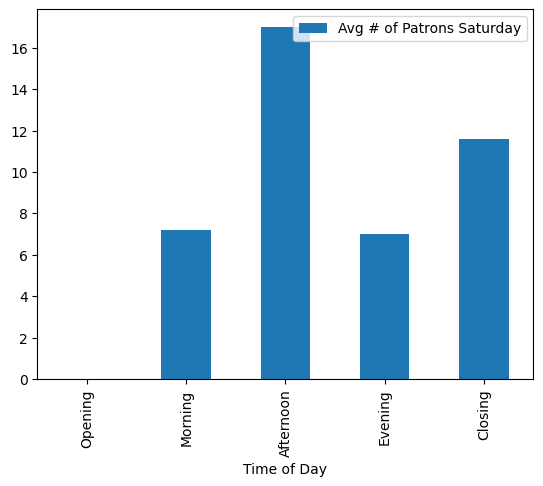

In [14]:
df1 = df.rename(columns={'LibraryTotal': 'Avg # of Total Library Patrons'})
autumn = df1.loc[df['Quarter'] == "Autumn"]
a = autumn[['Day', 'Time of Day', 'Avg # of Total Library Patrons']].copy()
aSn = a.loc[a['Day'] == "Sunday"]
aM = a.loc[a['Day'] == "Monday"]
aT = a.loc[a['Day'] == "Tuesday"]
aW = a.loc[a['Day'] == "Wednesday"]
aTh = a.loc[a['Day'] == "Thursday"]
aF = a.loc[a['Day'] == "Friday"]
aSt = a.loc[a['Day'] == "Saturday"]

aSnT = aSn.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Sunday'})
aMT = aM.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Monday'})
aTT = aT.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Tuesday'})
aWT = aW.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Wednesday'})
aThT = aTh.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Thursday'})
aFT = aF.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Friday'})
aStT = aSt.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Saturday'})

aT = pd.merge(aSnT,aMT, on='Time of Day').merge(aTT, on='Time of Day').merge(aWT, on='Time of Day').merge(aThT, on='Time of Day').merge(aFT, on='Time of Day').merge(aStT, on='Time of Day')

aT.plot(kind='bar')

aSnT.plot(kind='bar')
aMT.plot(kind='bar')
aTT.plot(kind='bar')
aWT.plot(kind='bar')
aThT.plot(kind='bar')
aFT.plot(kind='bar')
aStT.plot(kind='bar')

plt.show()

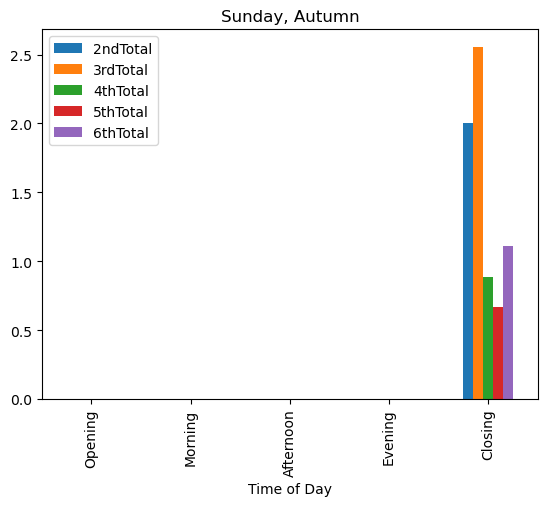

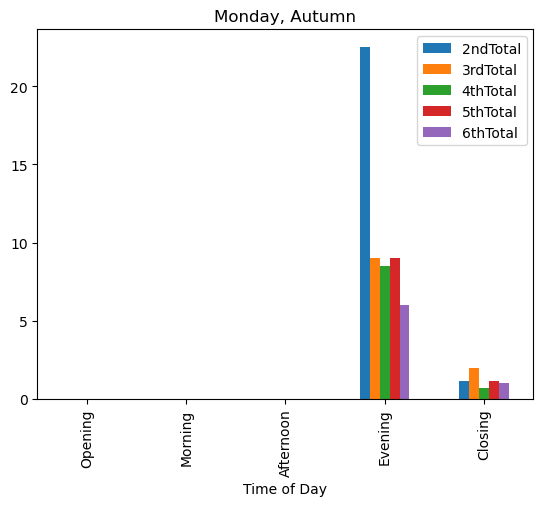

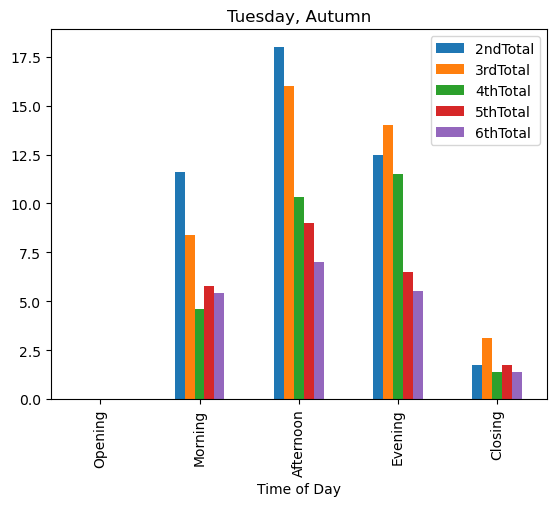

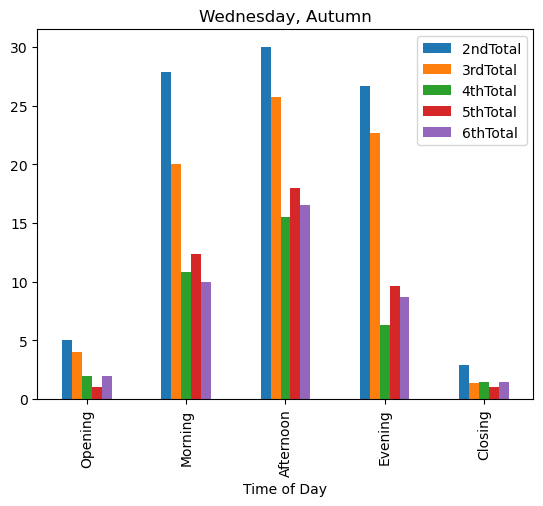

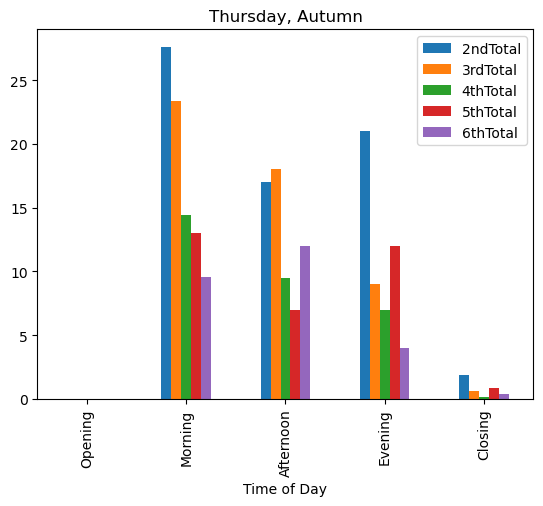

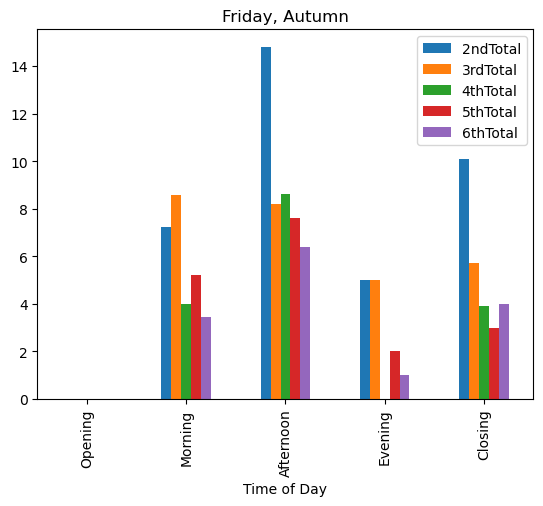

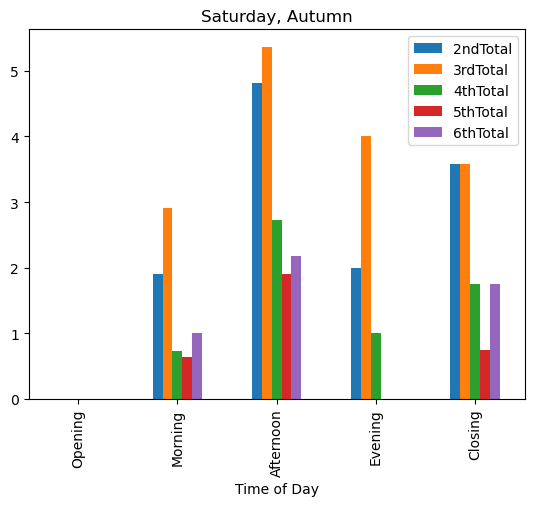

In [77]:
aF = autumn[['Day', 'Time of Day', '2ndTotal', '3rdTotal', '4thTotal', '5thTotal', '6thTotal']].copy()

aFSn = aF.loc[a['Day'] == "Sunday"]
aFM = aF.loc[a['Day'] == "Monday"]
aFT = aF.loc[a['Day'] == "Tuesday"]
aFW = aF.loc[a['Day'] == "Wednesday"]
aFTh = aF.loc[a['Day'] == "Thursday"]
aFF = aF.loc[a['Day'] == "Friday"]
aFSt = aF.loc[a['Day'] == "Saturday"]

aFSnT = aFSn.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Sunday'})
aFMT = aFM.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Monday'})
aFTT = aFT.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Tuesday'})
aFWT = aFW.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Wednesday'})
aFThT = aFTh.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Thursday'})
aFFT = aFF.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Friday'})
aFStT = aFSt.groupby('Time of Day').mean().reindex(['Opening', 'Morning', 'Afternoon', 'Evening', 'Closing']).rename(columns={'Avg # of Total Library Patrons':'Avg # of Patrons Saturday'})

aFSnT.plot(kind='bar', title='Sunday, Autumn')
aFMT.plot(kind='bar', title='Monday, Autumn')
aFTT.plot(kind='bar', title='Tuesday, Autumn')
aFWT.plot(kind='bar', title='Wednesday, Autumn')
aFThT.plot(kind='bar', title='Thursday, Autumn')
aFFT.plot(kind='bar', title='Friday, Autumn')
aFStT.plot(kind='bar', title='Saturday, Autumn')

plt.show()



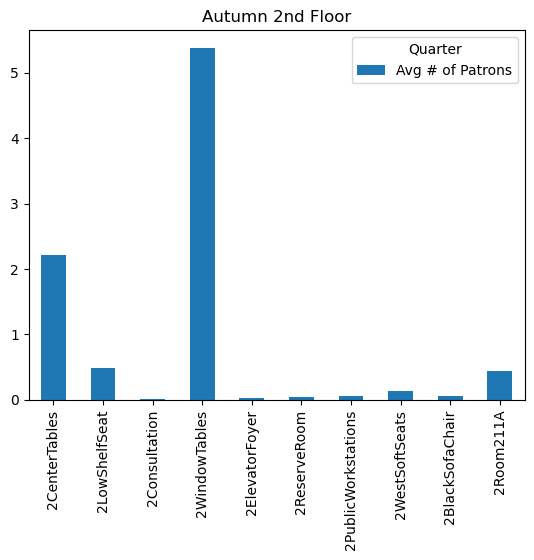

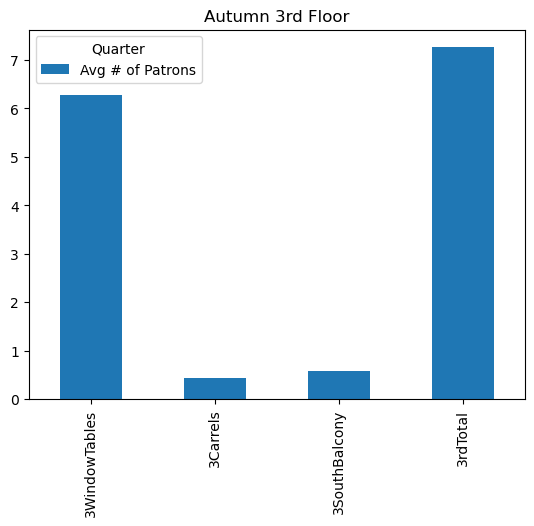

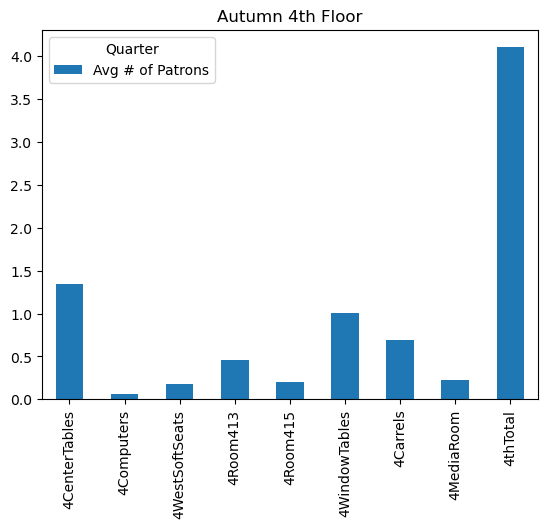

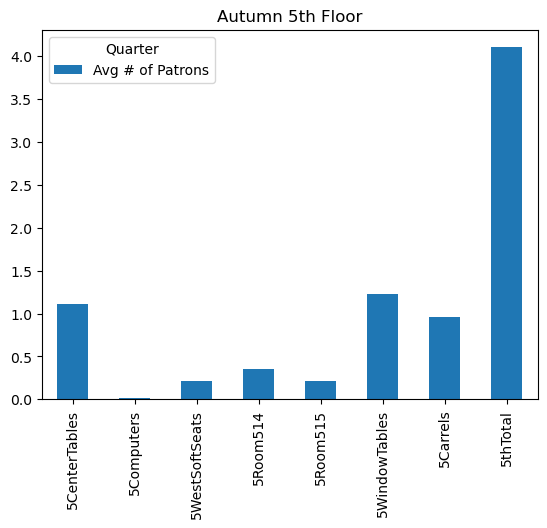

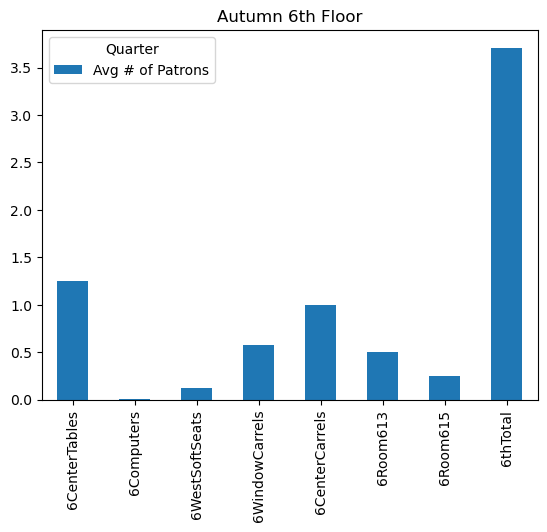

In [82]:
#autumn totals for each location
a2 = autumn[['Day', 'Quarter', '2CenterTables', '2LowShelfSeat', '2Consultation', '2WindowTables', '2ElevatorFoyer', '2ReserveRoom', '2PublicWorkstations', '2WestSoftSeats', '2BlackSofaChair', '2Room211A']].copy()
a3 = autumn[['Day', 'Quarter', '3WindowTables', '3Carrels', '3SouthBalcony', '3rdTotal']].copy()
a4 = autumn[['Day', 'Quarter', '4CenterTables', '4Computers', '4WestSoftSeats', '4Room413', '4Room415', '4WindowTables', '4Carrels', '4MediaRoom', '4thTotal']].copy()
a5 = autumn[['Day', 'Quarter', '5CenterTables', '5Computers', '5WestSoftSeats', '5Room514', '5Room515', '5WindowTables', '5Carrels', '5thTotal']].copy()
a6 = autumn[['Day', 'Quarter', '6CenterTables', '6Computers', '6WestSoftSeats', '6WindowCarrels', '6CenterCarrels', '6Room613', '6Room615', '6thTotal']].copy()

aSn2 = a2.loc[a['Day'] == "Sunday"]
aM2 = a2.loc[a['Day'] == "Monday"]
aT2 = a2.loc[a['Day'] == "Tuesday"]
aW2 = a2.loc[a['Day'] == "Wednesday"]
aTh2 = a2.loc[a['Day'] == "Thursday"]
aF2 = a2.loc[a['Day'] == "Friday"]
aSt2 = a2.loc[a['Day'] == "Saturday"]

a2P = a2.groupby('Quarter').mean().T.rename(columns={'Autumn':'Avg # of Patrons'})
a3P = a3.groupby('Quarter').mean().T.rename(columns={'Autumn':'Avg # of Patrons'})
a4P = a4.groupby('Quarter').mean().T.rename(columns={'Autumn':'Avg # of Patrons'})
a5P = a5.groupby('Quarter').mean().T.rename(columns={'Autumn':'Avg # of Patrons'})
a6P = a6.groupby('Quarter').mean().T.rename(columns={'Autumn':'Avg # of Patrons'})

a2P.plot(kind='bar', title='Autumn 2nd Floor')
a3P.plot(kind='bar', title='Autumn 3rd Floor')
a4P.plot(kind='bar', title='Autumn 4th Floor')
a5P.plot(kind='bar', title='Autumn 5th Floor')
a6P.plot(kind='bar', title='Autumn 6th Floor')

plt.show()
